# Loading everything


In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW
import os
import pandas as pn
import scipy
from getdist.mcsamples import loadMCSamples
import astropy.constants
import scipy.integrate as intgr
import getdist.plots as gdplt
%matplotlib inline

In [60]:
c1 = '#3820FF'
c2 = '#FF2020'

In [61]:
font = {'size'   : 16, 'family':'DejaVu Sans'}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [4.0,4.0]
plt.rcParams["figure.dpi"] = 150
cmap = plt.cm.get_cmap('hot')

# Load mcmc chains with infered cosmological posteriors

## full redshift range

Pantheon+ original analysis

In [67]:
panp_nogp =loadMCSamples(os.path.abspath('../chains/panp_nogp/panp_nogp_calib_001z'),settings={'ignore_rows':0.9})
panp_nogp.addDerived(panp_nogp.getParams().H0_gp,'H0','H_0')
panp_nogp.addDerived(panp_nogp.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_nogp.loglikes),panp_nogp.getGelmanRubin()

(42363, 0.010750305912144468)

Pantheon+ with GP Matern kernel

In [82]:
panp_mat =loadMCSamples(os.path.abspath('../chains/panp_gp_matern/panp_gp_001zhdzhel_matern'),settings={'ignore_rows':0.9})
panp_mat.addDerived(panp_mat.getParams().H0_gp,'H0','H_0')
panp_mat.addDerived(panp_mat.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_mat.loglikes),panp_mat.getGelmanRubin()

(52140, 0.008666826240030866)

Pantheon+ with GP RBF kernel

In [107]:
panp_RBF =loadMCSamples(os.path.abspath('../chains/panp_gp_RBF/panp_gp_RBF_calib_z'),settings={'ignore_rows':0.05})
panp_RBF.addDerived(panp_RBF.getParams().H0_gp,'H0','H_0')
panp_RBF.addDerived(panp_RBF.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_RBF.loglikes),panp_RBF.getGelmanRubin()

(38816, 0.006916975774974668)

Pantheon+ with GP $\sigma_1$ model

In [140]:
panp_mat_sigma1 =loadMCSamples(os.path.abspath('../chains/panp_gp_sigma1/1'),settings={'ignore_rows':0.8})
panp_mat_sigma1.addDerived(panp_mat_sigma1.getParams().H0_gp,'H0','H_0')
panp_mat_sigma1.addDerived(panp_mat_sigma1.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_mat_sigma1.loglikes),panp_mat_sigma1.getGelmanRubin()

(436460, 0.00503824175325945)

Pantheon+ with GP $\sigma_2$ model

In [138]:
panp_mat_sigma2 =loadMCSamples(os.path.abspath('../chains/panp_gp_sigma2/1'),settings={'ignore_rows':0.3})
panp_mat_sigma2.addDerived(panp_mat_sigma2.getParams().H0_gp,'H0','H_0')
panp_mat_sigma2.addDerived(panp_mat_sigma2.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_mat_sigma2.loglikes),panp_mat_sigma2.getGelmanRubin()

(121970, 0.006052077648832998)

## z<0.5

Pantheon+ original analysis

In [92]:
panp_nogp_z05 =loadMCSamples(os.path.abspath('../chains/panp_nogp_z05/final'),settings={'ignore_rows':0.2})
panp_nogp_z05.addDerived(panp_nogp_z05.getParams().H0_gp,'H0','H_0')
panp_nogp_z05.addDerived(panp_nogp_z05.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_nogp_z05.loglikes),panp_nogp_z05.getGelmanRubin()

(25761, 0.005325411802138808)

Pantheon+ with GP Matern kernel

In [93]:
panp_mat_z05 =loadMCSamples(os.path.abspath('../chains/panp_gp_matern_z05/panp_gp_calib_001z05'),settings={'ignore_rows':0.2})
panp_mat_z05.addDerived(panp_mat_z05.getParams().H0_gp,'H0','H_0')
panp_mat_z05.addDerived(panp_mat_z05.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_mat_z05.loglikes),panp_mat_z05.getGelmanRubin()

(40241, 0.007224529227076042)

## z<0.15

Pantheon+ original analysis

In [94]:
panp_nogp_z015 =loadMCSamples(os.path.abspath('../chains/panp_nogp_z015/final'),settings={'ignore_rows':0.8})
panp_nogp_z015.addDerived(panp_nogp_z015.getParams().H0_gp,'H0','H_0')
panp_nogp_z015.addDerived(panp_nogp_z015.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_nogp_z015.loglikes),panp_nogp_z015.getGelmanRubin()

(26757, 0.004994205140753968)

Pantheon+ with GP Matern kernel

In [95]:
panp_mat_z015 =loadMCSamples(os.path.abspath('../chains/panp_gp_matern_z015/1'),settings={'ignore_rows':0.8})
panp_mat_z015.addDerived(panp_mat_z015.getParams().H0_gp,'H0','H_0')
panp_mat_z015.addDerived(panp_mat_z015.getParams().omegam_gp,'omegam','\Omega_m')
len(panp_mat_z015.loglikes),panp_mat_z015.getGelmanRubin()

(56042, 0.009927602533856328)

# Figure 4. redshift-dependent $\sigma$

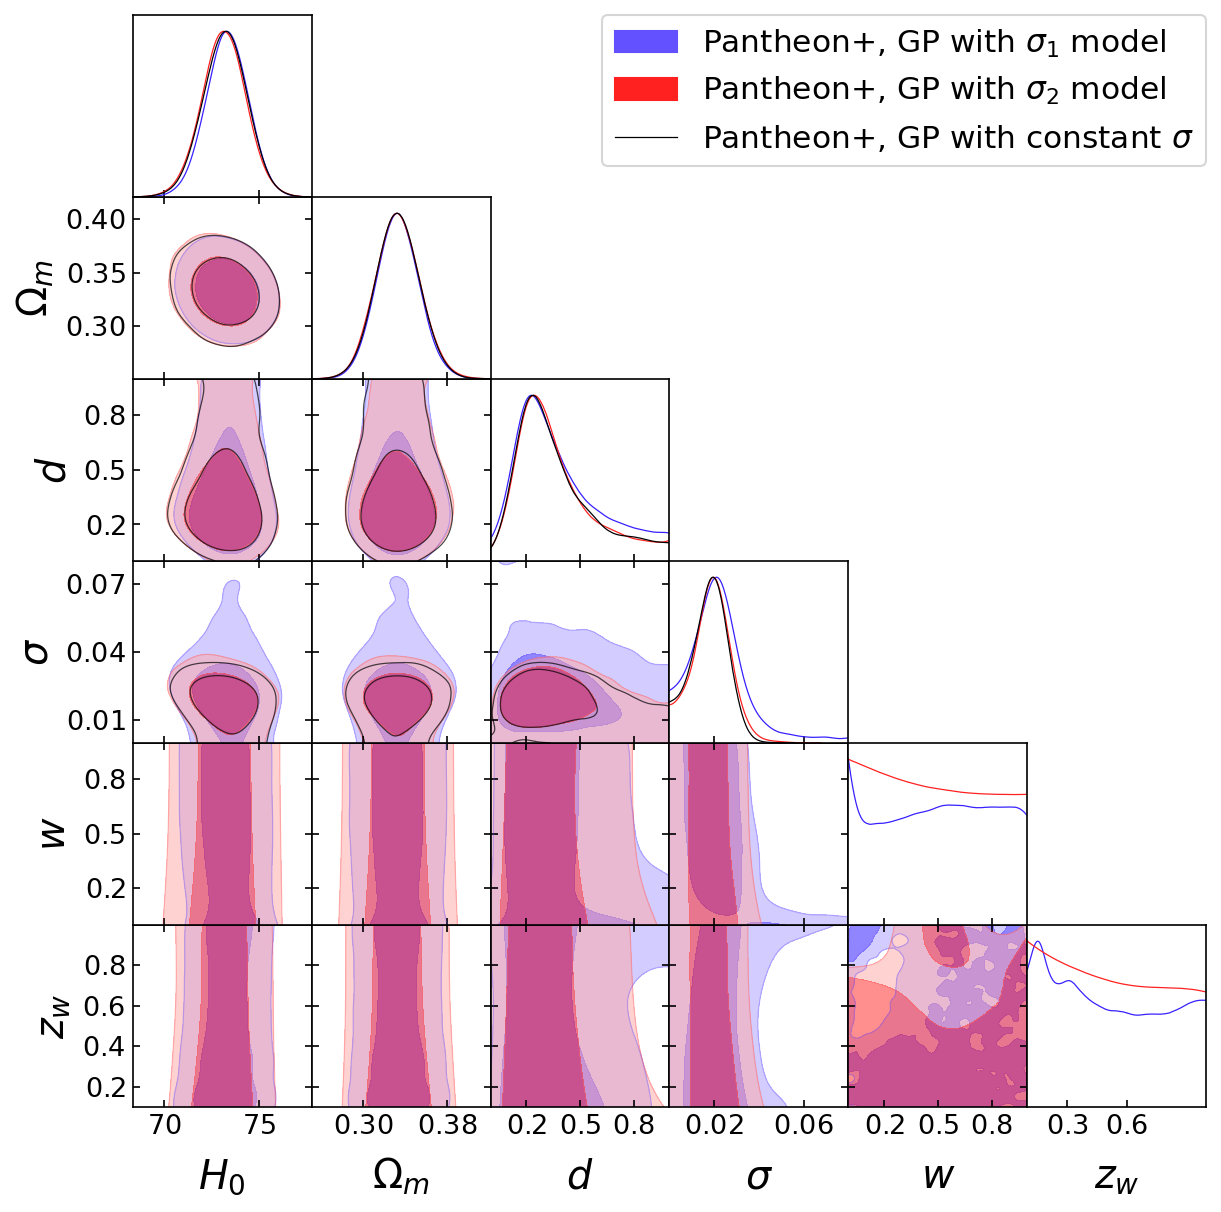

In [141]:
gdplot = gdplt.get_subplot_plotter(subplot_size=2)
gdplot.settings.axes_fontsize=16
gdplot.settings.axes_labelsize=22
gdplot.settings.legend_fontsize=18
gdplot.triangle_plot([panp_mat_sigma1,panp_mat_sigma2,panp_mat],['H0','omegam','d_gp','sigma_gp','sigma_zw_gp','zw_gp'],legend_loc='upper right', legend_labels=['Pantheon+, GP with $\sigma_1$ model','Pantheon+, GP with $\sigma_2$ model','Pantheon+, GP with constant $\sigma$','Pantheon+'],colors=['#6350FF',c2,'k','k'],line_args=[{'color':c1},{'color':c2},{'color':'k'},{'color':'k'}],filled=[True,True,False,False],alphas=[.7,.5,.7,.7])
gdplot.fig.set_size_inches(8,8)
gdplot.fig.savefig('appA.pdf',bbox_inches = 'tight')

# Figure 5. redshift bins

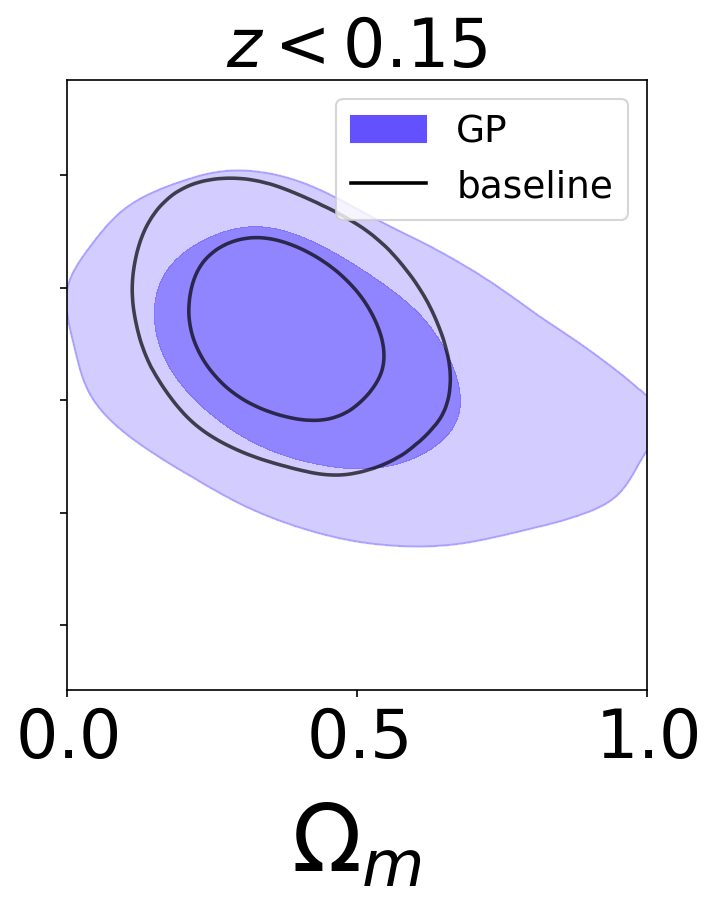

In [96]:
gdplot = gdplt.get_single_plotter(ratio=1)
gdplot.settings.axes_fontsize=16*2
gdplot.settings.axes_labelsize=22*2
gdplot.settings.legend_fontsize=18
gdplot.plot_2d([panp_mat_z015,panp_nogp_z015],param1='omegam_gp',param2='H0',filled=[True,False],alphas=[0.7,0.7],colors=['#6350FF','k'])

g=  gdplot.get_axes()
g.set_xlabel('$\Omega_m$')
xl = g.get_xlim()
yl = g.get_ylim()
g.set_ylabel(None)
g.set_yticklabels('')
gdplot.add_legend(['GP','baseline']);
g.set_title('$z<0.15$',fontdict={'fontsize':16*2})
gdplot.fig.savefig('appA23.pdf',bbox_inches = 'tight')

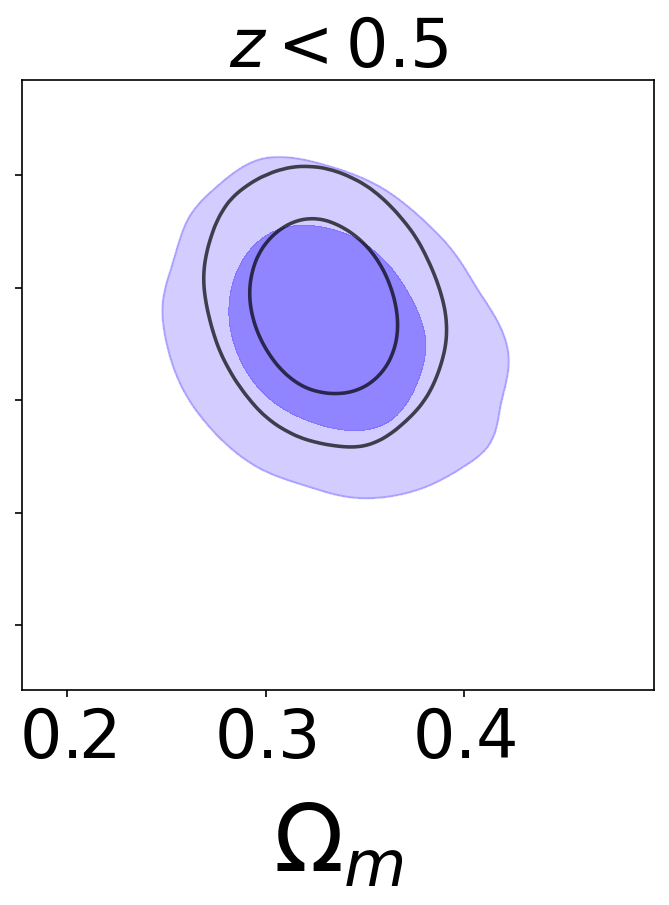

In [97]:
# gd_sample.getParams().H0

gdplot = gdplt.get_single_plotter(ratio=1)
gdplot.settings.axes_fontsize=16*2
gdplot.settings.axes_labelsize=22*2
gdplot.settings.legend_fontsize=18

gdplot.plot_2d([panp_mat_z05,panp_nogp_z05],param1='omegam_gp',param2='H0',filled=[True,False],alphas=[0.7,0.7],colors=['#6350FF','k'])
g=  gdplot.get_axes()
g.set_xlabel('$\Omega_m$')
g.set_ylabel(None)
g.set_title('$z<0.5$',fontdict={'fontsize':16*2})
g.set_ylim(yl)
g.set_yticklabels('')
gdplot.fig.savefig('appA22.pdf',bbox_inches = 'tight')

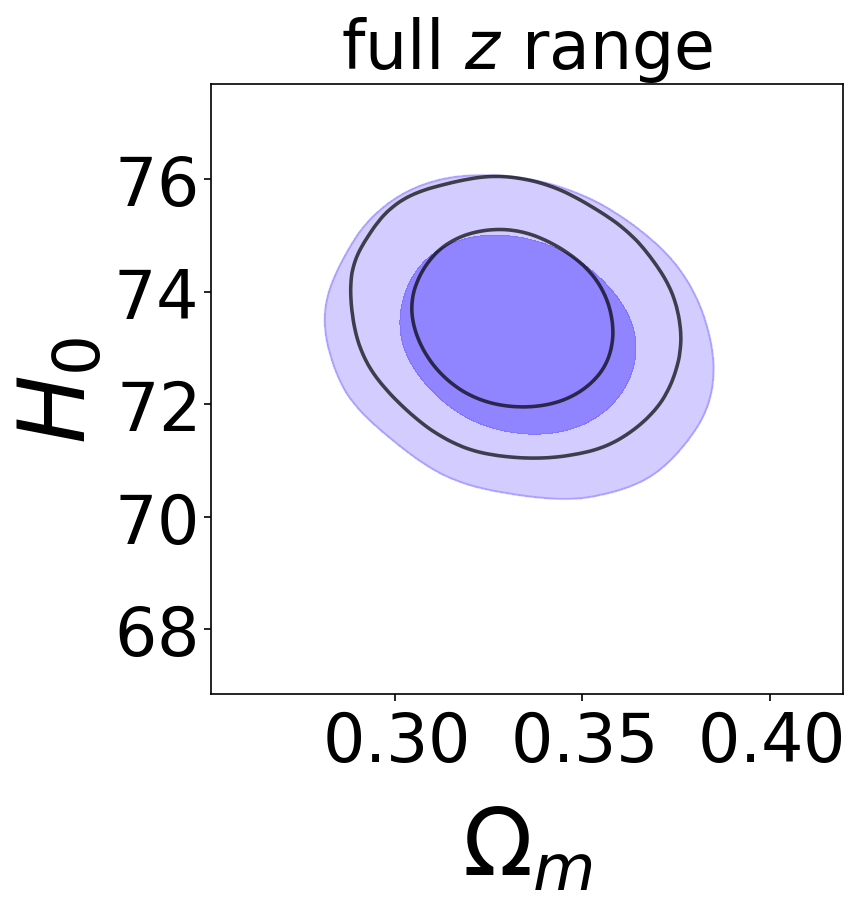

In [100]:
gdplot = gdplt.get_single_plotter(ratio=1)
gdplot.settings.axes_fontsize=16*2
gdplot.settings.axes_labelsize=22*2
gdplot.settings.legend_fontsize=18

gdplot.plot_2d([panp_mat,panp_nogp],param1='omegam_gp',param2='H0',filled=[True,False],alphas=[0.7,0.7],colors=['#6350FF','k'])
g=  gdplot.get_axes()
g.set_xlabel('$\Omega_m$')

g.set_ylim(yl)
g.set_title('full $z$ range',fontdict={'fontsize':16*2})
gdplot.fig.savefig('appA21.pdf',bbox_inches = 'tight')

# Figure 6. RBF kernel VS Matern kernel

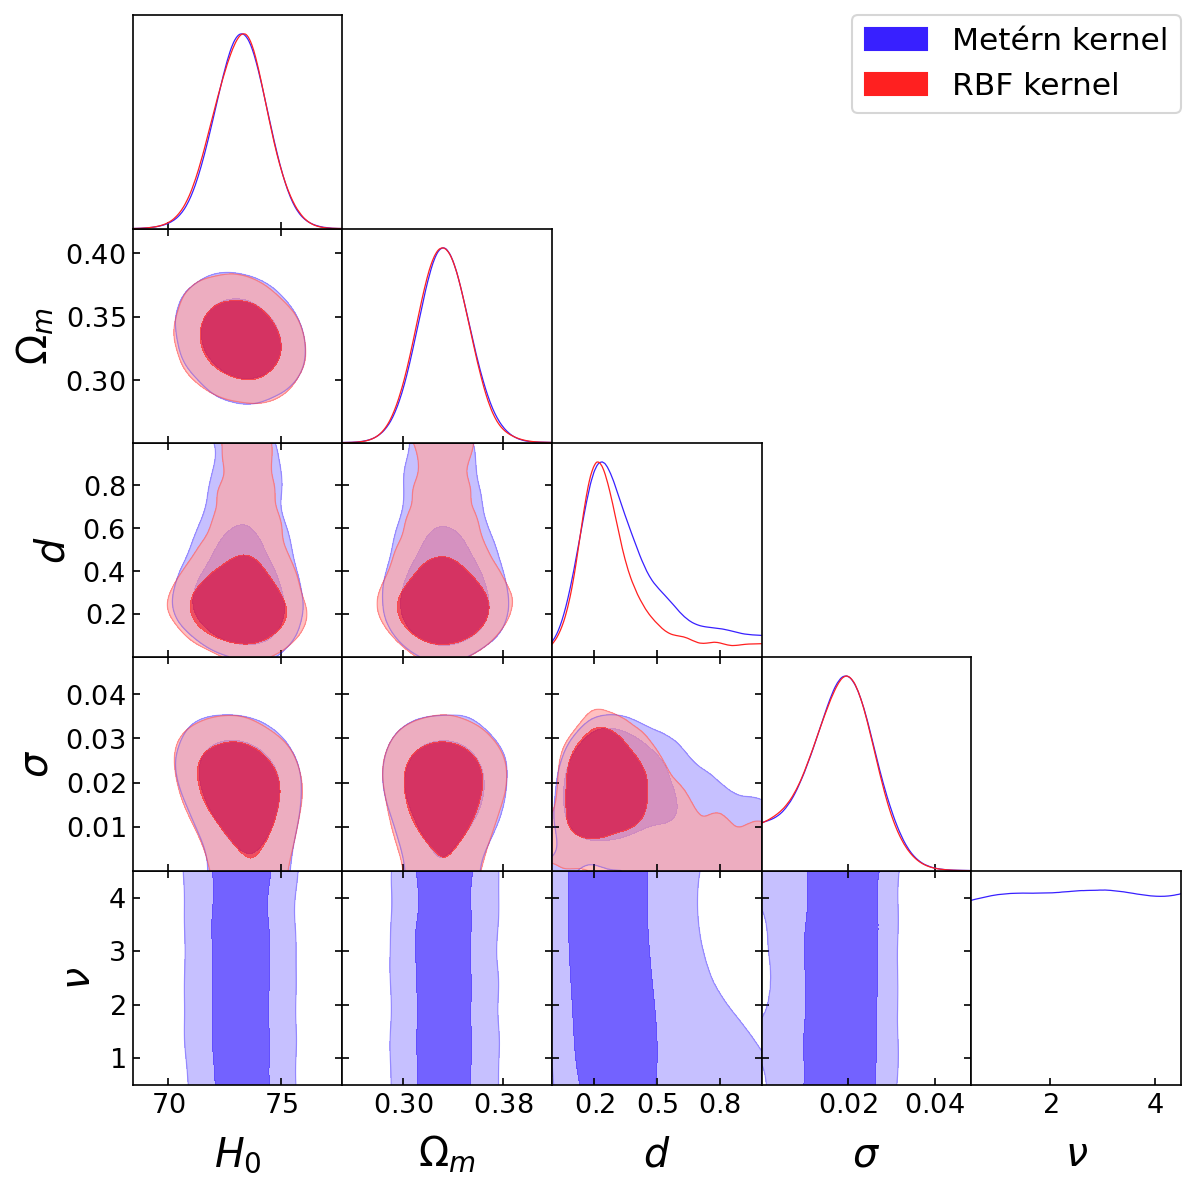

In [113]:
gdplot = gdplt.get_subplot_plotter(subplot_size=2)
gdplot.settings.axes_fontsize=16
gdplot.settings.axes_labelsize=22
gdplot.settings.legend_fontsize=18
gdplot.triangle_plot([panp_mat,panp_RBF],['H0','omegam','d_gp','sigma_gp','nu_gp'],legend_loc='upper right', legend_labels=['Metérn kernel','RBF kernel'],colors=[c1,c2,'k','k'],line_args=[{'color':c1},{'color':c2},{'color':'k'},{'color':'k'}],filled=[True,True,False,False],alphas=[.7,.7,1.,1.])
gdplot.fig.set_size_inches(8,8)
gdplot.fig.savefig('RBF.pdf',bbox_inches = 'tight')